In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
print('TensorFlow Version: ' + tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# the following two lines are to avoid an ssl issue on locally hosted instances
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

print('libraries imported')

TensorFlow Version: 1.13.1
libraries imported


In [4]:
# Following example found at:
# https://www.tensorflow.org/alpha/tutorials/keras/basic_classification/

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print('fashion_mnist data set loaded and normalized')

In [6]:
# define class names for classes of fashion images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

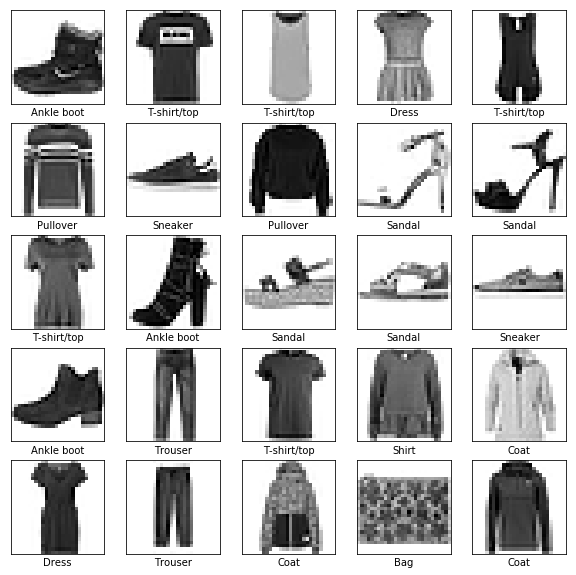

In [7]:
# show the top 25 images in the training set with corresponding class names
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# run training images and labels through the model 5 times
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4994 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3745 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3362 - acc: 0.8787
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3102 - acc: 0.8868
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2951 - acc: 0.8913


In [12]:
# evaluate the accuracy and loss of the model
# expected value greater than 0.85
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3560 - acc: 0.8701

Test accuracy: 0.8701


In [13]:
# get model predictions of test_images
predictions = model.predict(test_images)

# display the prediction values for the first test_image
predictions[0]

array([1.5214694e-05, 1.4942151e-08, 2.4745344e-07, 1.6749741e-08,
       1.0984027e-06, 5.2956645e-03, 9.7274624e-06, 3.5561908e-02,
       6.9296868e-05, 9.5904684e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [14]:
# function defined to display the image being evaluated
# images where the predicted label is correct are highlighted in blue
# images where the predicted label is incorrect are highlighted in red
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# function defined to display the prediction graph showing predicted likelyhood of each class
# again correct predictions highlight blue, incorrect highlight red
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

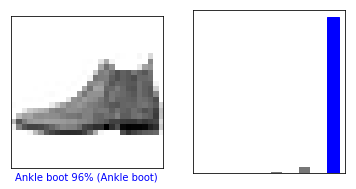

In [15]:
# use the two above functions to show the image and prediction for the first image in the test set
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

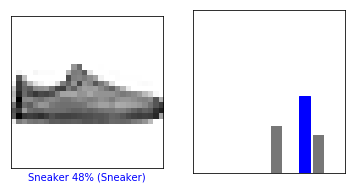

In [16]:
# use the two above functions to show the image and prediction for the 12th image in the test set
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

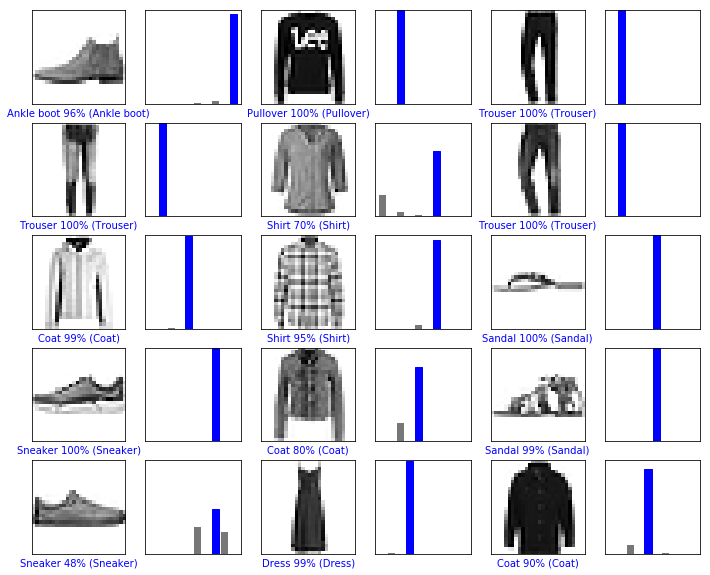

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()